In [5]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import scipy
import glob
import os
r0 = os.getcwd()

In [6]:
K=[]
K.append(pd.read_excel(r0+r'\daici\新峰+统计\LLL NPC P20-2.xlsx',sheet_name='Sheet1'))
K.append(pd.read_excel(r0+r'\daici\新峰+统计\LLL NPC P25-2.xlsx',sheet_name='Sheet1'))
K.append(pd.read_excel(r0+r'\daici\新峰+统计\LLL NPC P30-2.xlsx',sheet_name='Sheet1'))
M=pd.concat(K)


2952 2968
2914 2931
2865 2878
2843 2858
1683 1699
1648 1659
1633 1644
1539 1557
1520 1537
1508 1520
1226 1244
1075 1092
1051 1068
1040 1058
3320 3336
3056 3073
3005 3026
1731 1748
1704 1721
1602 1618
1567 1586
1459 1475
1442 1460
1392 1411
1302 1322
1143 1161
1014 1031


In [3]:
mean_values = M.mean()
M.fillna(mean_values, inplace=True)
Z=[]
for i in M.columns[1:]:
    low = int(np.min(M[i])-2.5)
    high = int(np.max(M[i])+2.5)
    print(low,high)
    Z.append([low,high])
M

,Unnamed: 0,Vas(CH3),Vas(CH2),Vs(CH3),Vs(CH2),N-H bending of Amide I,a-helical of Amide I,b-pleated sheet of Amide I,a-helical of Amide II,b-pleated sheet of Amide II,...,C=O stretching of lipid esters,C=O antisymmetric stretching: RNA and purine base,C4-C5 and C=N stretching in imidazole ring of DNA,C4-C5 and C=N stretching in imidazole ring of RNA,CH2 bending vibrations,CH3 bending and CH2 scissoring vibrations,COO- symmetric stretching,Peptide side chain vibrations,CO–O–C antisymmetric stretching vibrations of glycogen and nucleic acid ribose,Mainly from glycogen
0,0,2961.40,2917.94,2871.76,2853.30,1690.76,1654.10,1641.95,1546.96,1529.60,...,1737.61,1713.09750,1611.28,1573.23,1470.27,1448.67,1396.62875,1307.48,1154.08,1023.27
1,1,2962.69,2923.48,2870.66,2852.96,1690.42,1655.28,1642.38,1544.92,1529.17,...,1744.07,1711.53500,1610.56,1570.32,1469.47,1453.73,1397.47250,1310.99,1153.80,1024.84
2,2,2957.33,2922.78,2871.53,2853.09,1689.98,1655.17,1641.82,1546.02,1527.48,...,1737.73,1714.28500,1611.16,1573.84,1469.38,1453.95,1402.41000,1307.54,1156.11,1026.61
3,3,2961.17,2922.07,2875.39,2852.16,1692.24,1654.79,1642.49,1541.74,1531.28,...,1737.62,1710.94125,1615.61,1581.20,1469.43,1457.91,1399.25375,1306.05,1154.87,1023.20
4,4,2957.10,2923.80,2871.87,2851.35,1687.55,1655.13,1637.86,1544.19,1531.66,...,1739.51,1711.56625,1613.15,1575.24,1468.84,1454.60,1397.41000,1308.46,1152.08,1022.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,52,2962.66,2917.52,2869.79,2851.81,1689.27,1654.89,1640.81,1549.16,1531.03,...,1738.43,1710.56625,1606.49,1574.55,1470.42,1455.32,1398.69125,1314.18,1154.03,1022.38
53,53,2956.92,2923.03,2873.55,2851.38,1689.91,1654.01,1640.81,1546.21,1531.10,...,1743.90,1711.00375,1608.94,1574.66,1468.90,1451.98,1404.78500,1309.41,1154.81,1027.07
54,54,2961.50,2923.41,2872.53,2850.56,1689.77,1656.05,1639.72,1545.30,1533.43,...,1740.26,1716.12875,1611.24,1579.79,1467.99,1455.78,1401.41000,1311.51,1157.15,1022.12
55,55,2960.59,2923.44,2872.19,2850.96,1690.18,1655.51,1641.66,1546.79,1531.79,...,1743.45,1710.50375,1607.42,1574.79,1471.24,1456.05,1398.66000,1308.27,1155.28,1028.72


In [36]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
def calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    line_y_at_peak = m * peak_x + b
    vertical_distance = abs(peak_y - line_y_at_peak)
    y_axis_distance = peak_y - line_y_at_peak
    area = 0.5 * abs((x2 - x1) * (peak_y + line_y_at_peak - y1 - y2))
    peak_height = peak_y - min(y1, y2)
    return y_axis_distance, vertical_distance, area, peak_height

Recorder_sigs=[]

root_df=glob.glob(r0+r'\daici\LLL\LLL P20二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[index_id],header=None)[0]
    signal = pd.read_csv(root_df[index_id],header=None)[1]
    # 找到峰值
    signal = -1*signal
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))
    
root_df=glob.glob(r0+r'\daici\LLL\LLL P25二阶后\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[index_id],header=None)[0]
    signal = pd.read_csv(root_df[index_id],header=None)[1]
    # 找到峰值
    signal = -1*signal
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

root_df=glob.glob(r0+r'\daici\LLL\LLL P30 二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[index_id],header=None)[0]
    signal = pd.read_csv(root_df[index_id],header=None)[1]
    # 找到峰值
    signal = -1*signal
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

In [51]:
import xgboost as xgb
for peak_number in range(25):
    low,high = Z[peak_number]
    P=[]
    Y=[]
    for n,single_signal in enumerate(Recorder_sigs):
        peak_value=M.iloc[n,1+peak_number]
        valid_peak = (single_signal[:,0] > low) & (single_signal[:,0] < high)
        peaks = single_signal[valid_peak]
        if len(peaks)==0:
            continue
        else:
            for peak in peaks:
                P+=[list(peak)+[peak_value]]
            Y_p= [0 for i in range(len(peaks))]
            Y_max = np.argmin(np.abs(peak_value-peaks[:,0]))
            print(peak_value,peaks[:,0],Y_max)
            Y_p[Y_max]=1
            Y+=Y_p
    if len(P)==0:
        continue

    params = {
    'objective':  'reg:squarederror',  # or 'reg:squarederror' for regression problems
    'eval_metric': 'logloss',  # or 'rmse' for regression problems
    'max_depth': 3,  # Increased tree depth
    'learning_rate': 0.1,  # Learning rate
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'gamma': 0,  # Minimum loss reduction required to make a further partition
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'alpha': 0,  # L1 regularization term on weights
    'lambda': 0,  # L2 regularization term on weights
        'eval_metric': 'logloss'  # Add this line
    }
    dtrain = xgb.DMatrix(P, label=Y)
    bst = xgb.train(params, dtrain, num_boost_round=100)
    dtest = xgb.DMatrix(P)
    preds = bst.predict(dtest)
    predictions = [round(value) for value in preds]
    print(np.sum([predictions[i]==Y[i] for i in range(len(Y))])/len(Y))
    # Save model to file
    bst.save_model(M.columns[1+peak_number]+'xgboost_model.json')


2961.4 [2961.161] 0
2962.69 [2956.822 2962.607] 1
2957.33 [2957.304 2962.125] 0
2961.17 [2961.161] 0
2957.1 [2957.304 2967.91 ] 0
2962.0 [2954.411 2962.125] 1
2957.84 [2957.786 2962.607] 0
2962.71 [2956.339 2962.607] 1
2961.86 [2954.893 2961.643] 1
2962.37 [2955.375 2962.607 2967.91 ] 1
2962.46 [2955.375 2962.607] 1
2964.55 [2956.822 2964.535] 1
2961.42 [2961.643] 0
2958.2 [2958.268 2964.053] 0
2957.66 [2957.786 2963.571] 0
2958.84 [2952.965 2958.75 ] 1
2959.89 [2959.714] 0
2957.94 [2957.786 2963.571] 0
2961.07 [2954.893 2961.161] 1
2962.44 [2957.786 2962.607] 1
2959.56 [2959.714] 0
2959.15 [2953.447 2959.232 2962.125] 1
2962.89 [2956.822 2963.089] 1
2962.56 [2956.822 2962.607] 1
2964.17 [2956.822 2964.053] 1
2957.95 [2957.786 2964.535] 0
2961.6 [2961.643] 0
2963.29 [2957.786 2963.089] 1
2961.07 [2954.411 2961.161 2965.982] 1
2956.27 [2956.339 2961.643] 0
2955.96 [2955.857 2966.946] 0
2956.92 [2956.822 2967.91 ] 0
2961.57 [2955.375 2961.643 2966.946] 1
2963.78 [2956.339 2963.571] 1
296

1.0
2871.76 [2871.969] 0
2870.66 [2870.523 2876.79 ] 0
2871.53 [2871.487] 0
2875.39 [2869.558 2875.344] 1
2871.87 [2865.219 2871.969] 1
2871.06 [2871.005 2877.272] 0
2870.06 [2870.041 2876.308] 0
2870.8 [2871.005] 0
2870.75 [2870.523 2876.308] 0
2871.59 [2865.219 2871.487] 1
2870.54 [2870.523] 0
2871.76 [2871.969] 0
2873.73 [2869.076 2873.897] 1
2873.04 [2872.933] 0
2873.13 [2868.594 2872.933] 1
2874.25 [2867.63 2874.38] 1
2871.81 [2871.969] 0
2871.48 [2871.487] 0
2871.53 [2871.487] 0
2872.89 [2872.933] 0
2872.47 [2872.451] 0
2873.56 [2867.148 2873.415] 1
2871.28 [2871.487] 0
2874.86 [2870.041 2874.862] 1
2872.16 [2871.969] 0
2872.41 [2872.451 2877.754] 0
2873.58 [2867.148 2873.415] 1
2871.53 [2871.487] 0
2869.96 [2870.041] 0
2873.66 [2868.112 2873.897] 1
2870.29 [2870.523] 0
2869.32 [2869.076 2876.308] 0
2869.29 [2869.076 2875.826] 0
2873.52 [2867.148 2873.415] 1
2870.41 [2870.523 2876.308] 0
2872.96 [2872.933] 0
2869.55 [2869.558] 0
2873.94 [2866.184 2873.897] 1
2869.13 [2869.076 287

1.0
1690.76 [1683.069 1690.783] 1
1690.42 [1690.301 1692.229] 0
1689.98 [1689.819 1698.497] 0
1692.24 [1684.034 1687.408 1688.373 1692.229 1698.979] 3
1687.55 [1687.408 1693.194 1698.497] 0
1690.96 [1683.551 1690.783 1691.747 1698.979] 1
1689.81 [1684.034 1689.819 1698.979] 1
1689.61 [1689.819 1698.979] 0
1690.54 [1690.301 1697.533] 0
1690.04 [1689.819 1693.194] 0
1690.57 [1690.783 1698.497] 0
1689.59 [1688.373 1694.158] 0
1689.17 [1683.551 1689.337 1698.979] 1
1688.36 [1688.373] 0
1689.81 [1684.034 1689.819] 1
1690.12 [1690.301 1698.497] 0
1692.44 [1692.229 1698.497] 0
1688.44 [1688.373] 0
1692.2 [1692.229 1696.569] 0
1690.55 [1690.783] 0
1689.57 [1684.034 1689.337 1698.979] 1
1690.65 [1690.783] 0
1690.41 [1690.301 1698.497] 0
1690.15 [1690.301 1698.497] 0
1689.26 [1689.337] 0
1690.07 [1690.301 1698.015] 0
1689.63 [1689.819] 0
1688.65 [1688.855 1692.229] 0
1692.4 [1692.229] 0
1688.48 [1688.373] 0
1686.04 [1685.962 1693.194] 0
1688.45 [1688.373 1692.712] 0
1689.12 [1689.337 1692.229] 0

1.0
1641.95 [1637.268 1642.089] 1
1642.38 [1638.232 1642.572] 1
1641.82 [1641.607] 0
1642.49 [1642.572] 0
1637.86 [1637.75  1641.607] 0
1641.69 [1641.607] 0
1640.87 [1640.643] 0
1638.76 [1638.715 1642.572] 0
1642.07 [1633.411 1635.822 1642.089] 2
1642.3 [1642.089] 0
1641.86 [1638.232 1642.089] 1
1640.79 [1640.643] 0
1639.31 [1639.197] 0
1637.96 [1637.75  1641.607] 0
1637.37 [1637.268] 0
1638.18 [1638.232] 0
1638.19 [1638.232] 0
1638.42 [1638.232] 0
1638.35 [1638.232] 0
1639.57 [1639.679] 0
1638.69 [1638.715] 0
1637.86 [1637.75] 0
1642.01 [1642.089] 0
1640.77 [1640.643] 0
1638.08 [1638.232] 0
1639.32 [1639.197] 0
1638.52 [1638.715] 0
1638.06 [1638.232] 0
1641.57 [1641.607] 0
1638.89 [1638.715] 0
1638.52 [1638.715] 0
1639.83 [1639.679] 0
1638.7 [1638.715] 0
1639.38 [1639.197] 0
1637.83 [1637.75  1642.089] 0
1638.69 [1638.715] 0
1639.38 [1639.197] 0
1638.96 [1639.197] 0
1640.22 [1640.161] 0
1639.87 [1639.679] 0
1639.14 [1639.197] 0
1638.65 [1638.715] 0
1639.79 [1639.679] 0
1638.47 [1638.2

1.0
1529.6 [1521.078 1529.756 1536.988] 1
1529.17 [1529.274 1536.988] 0
1527.48 [1527.346 1536.506] 0
1531.28 [1521.56  1531.203] 1
1531.66 [1527.346 1531.685] 1
1526.66 [1526.864] 0
1528.31 [1528.31  1536.988] 0
1529.03 [1528.792] 0
1530.55 [1522.042 1530.72 ] 1
1530.3 [1530.238] 0
1528.69 [1521.078 1528.792] 1
1530.68 [1523.007 1530.72 ] 1
1529.99 [1523.489 1529.756 1536.024] 1
nan [1523.007 1536.024] 0
1528.85 [1528.792 1536.024] 0
1531.05 [1523.007 1531.203 1536.988] 1
1530.43 [1530.238 1536.988] 0
1529.71 [1523.007 1529.756 1536.506] 1
1530.19 [1530.238] 0
1529.51 [1522.042 1529.274 1536.988] 1
1529.84 [1522.524 1529.756 1536.024] 1
1530.64 [1530.72  1535.542] 0
1524.2 [1523.971 1536.506] 0
1524.58 [1524.453 1536.988] 0
1529.9 [1523.007 1529.756 1536.024] 1
1529.34 [1529.274] 0
1530.06 [1522.524 1530.238 1535.542] 1
1530.66 [1523.489 1530.72  1535.542] 1
1531.93 [1522.524 1532.167] 1
1525.42 [1525.417 1534.095] 0
1527.31 [1527.346 1535.059] 0
1528.6 [1528.792 1536.988] 0
1527.09 [

1.0
1229.24 [1229.397 1241.932] 0
1230.84 [1230.844 1241.45 ] 0
1229.75 [1229.88  1241.932] 0
1235.08 [1230.362 1235.183 1240.968] 1
1232.83 [1232.772 1240.486] 0
1228.8 [1228.915 1240.486] 0
1233.81 [1229.397 1233.737 1241.932] 1
1234.54 [1229.397 1234.701 1240.968] 1
1236.41 [1229.397 1236.629] 1
1231.26 [1231.326] 0
1236.6 [1228.915 1236.629] 1
1235.82 [1227.469 1235.665 1242.897] 1
1232.95 [1232.772 1241.932] 0
1232.83 [1227.469 1232.772 1236.629 1242.415] 1
1231.8 [1231.808 1240.004] 0
1234.3 [1229.397 1234.219 1241.932] 1
1233.72 [1233.737 1242.415] 0
1235.29 [1235.183 1241.45 ] 0
1229.43 [1229.397 1240.968] 0
1235.89 [1227.469 1235.665] 1
1237.94 [1228.915 1238.076] 1
1231.67 [1231.808 1240.486] 0
1236.74 [1229.397 1236.629] 1
1230.45 [1230.362 1239.04 ] 0
1230.05 [1229.88  1237.111 1243.379] 0
1234.19 [1227.951 1234.219 1241.45 ] 1
1233.39 [1226.023 1233.254 1240.968] 1
1234.67 [1227.469 1234.701 1240.968] 1
1229.83 [1229.88  1240.968] 0
1230.36 [1230.362 1236.629 1243.861] 0
1

1.0
1060.97 [1052.461 1061.139] 1
1059.18 [1051.496 1059.21 ] 1
1055.14 [1055.353 1064.514] 0
1061.68 [1052.943 1061.621] 1
1059.67 [1052.461 1059.692 1066.442] 1
1055.49 [1055.353 1065.478] 0
1065.29 [1054.389 1065.478] 1
1062.68 [1056.8   1062.585] 1
1061.74 [1053.425 1061.621] 1
1057.91 [1051.014 1057.764 1065.96 ] 1
1061.28 [1053.907 1061.139] 1
1062.93 [1056.318 1063.067] 1
1062.0 [1057.764 1062.103 1066.924] 1
1061.44 [1054.871 1061.621 1067.888] 1
1058.28 [1051.014 1058.246 1064.031] 1
1058.51 [1053.425 1058.728 1067.406] 1
1057.13 [1051.014 1057.282 1066.924] 1
1057.68 [1052.943 1057.764 1066.924] 1
1056.52 [1056.318 1063.549] 0
1057.73 [1057.764 1067.406] 0
1059.25 [1052.943 1059.21  1066.924] 1
1055.73 [1055.835 1066.442] 0
1055.78 [1055.835 1067.406] 0
1059.66 [1059.692 1067.406] 0
1057.06 [1057.282 1064.031 1066.924] 0
1056.42 [1051.496 1056.318 1067.406] 1
1060.06 [1054.389 1060.175 1066.924] 1
1057.79 [1057.764 1067.888] 0
1059.25 [1059.21] 0
1057.86 [1057.764 1066.442] 0

1.0
3328.77 [3328.533] 0
3328.03 [3323.712 3328.051 3334.319] 1
3332.3 [3322.266 3332.39 ] 1
3327.22 [3327.569] 0
3329.62 [3329.498] 0
3334.48 [3322.748 3334.319] 1
3329.16 [3324.677 3329.016] 1
3328.67 [3322.266 3328.533] 1
3328.25 [3328.051] 0
3327.64 [3327.569] 0
3327.75 [3327.569] 0
3326.08 [3326.123 3332.39 ] 0
3330.75 [3322.748 3330.944 3335.765] 1
3323.64 [3323.712 3335.765] 0
3330.74 [3323.23  3330.944] 1
3329.61 [3324.194 3329.498] 1
3323.89 [3323.712] 0
3331.49 [3323.23  3331.426] 1
3328.68 [3328.533] 0
3323.23 [3323.23  3335.765] 0
3329.54 [3323.23  3329.498] 1
3331.53 [3322.748 3331.426] 1
3331.46 [3323.712 3331.426] 1
3325.18 [3325.159 3335.765] 0
3328.87 [3324.194 3329.016] 1
3332.37 [3323.23 3332.39] 1
3325.92 [3320.337 3326.123 3335.283] 1
3329.36 [3324.194 3329.498] 1
3324.98 [3325.159 3333.837] 0
3326.39 [3326.605 3334.319] 0
3327.08 [3327.087] 0
3331.49 [3324.677 3331.426] 1
3326.87 [3327.087 3335.283] 0
3324.06 [3324.194 3334.319] 0
3328.05 [3328.051] 0
3332.45 [332

1.0
3015.98 [3009.372 3016.122 3023.354] 1
3017.99 [3008.408 3018.05  3022.389] 1
3013.36 [3006.962 3013.229 3019.015 3024.318] 1
3010.51 [3010.336 3023.354] 0
3010.25 [3010.336 3019.015 3024.8  ] 0
3014.6 [3014.676 3023.836] 0
3011.24 [3011.301 3024.318] 0
3007.64 [3007.444 3023.354] 0
3011.2 [3005.997 3011.301 3022.389] 1
3016.77 [3009.372 3016.604 3024.318] 1
3011.43 [3011.301 3023.354] 0
3011.34 [3011.301 3019.015 3024.8  ] 0
3017.63 [3009.372 3017.568 3025.282] 1
3016.23 [3010.336 3016.122 3023.836] 1
3011.52 [3011.301 3022.872] 0
3017.19 [3005.515 3010.336 3017.086 3024.318] 2
3017.26 [3010.336 3017.086 3025.282] 1
3016.61 [3010.819 3016.604 3024.8  ] 1
3015.88 [3008.89  3015.64  3024.318] 1
3017.34 [3010.819 3017.568 3025.282] 1
3017.9 [3009.854 3018.05  3025.282] 1
3017.77 [3010.819 3017.568 3025.764] 1
3014.8 [3009.372 3014.676 3022.872] 1
3018.38 [3010.819 3018.532] 1
3018.32 [3010.336 3018.532 3025.764] 1
3017.82 [3010.336 3018.05  3024.8  ] 1
3016.9 [3009.854 3017.086 3024.

1.0
1713.0975 [1705.729 1712.961] 1
1711.535 [1705.729 1711.514 1719.71 ] 1
1714.285 [1706.211 1714.407] 1
1710.94125 [1705.247 1711.032 1720.674] 1
1711.56625 [1705.247 1711.514 1720.192] 1
1711.535 [1705.247 1711.514 1718.746] 1
1710.62875 [1706.211 1710.55 ] 1
1711.44125 [1706.693 1711.514 1717.782] 1
1711.2225 [1705.729 1711.032] 1
1712.41 [1705.247 1712.478] 1
1715.62875 [1705.729 1711.514 1715.853] 2
1717.75375 [1704.765 1710.068 1717.782] 2
1714.50375 [1705.247 1714.407] 1
1713.00375 [1712.961 1720.674] 0
1715.87875 [1705.247 1708.621 1709.586 1715.853] 3
1712.41 [1712.478] 0
1714.82 [1714.889 1720.674] 0
1708.9725 [1709.104 1719.71 ] 0
1712.62875 [1705.247 1712.478] 1
1715.16 [1708.621 1715.371] 1
1715.785 [1707.175 1715.853] 1
1713.91 [1708.621 1713.925] 1
1713.2225 [1705.729 1713.443] 1
1716.50375 [1705.247 1716.335] 1
1715.2225 [1708.621 1715.371] 1
1710.25375 [1705.729 1710.068 1715.371] 1
1710.00375 [1710.068 1720.192] 0
1711.31625 [1711.514 1719.71 ] 0
1713.12875 [1712.96

1.0
1573.23 [1573.147 1580.861] 0
1570.32 [1570.254 1579.896 1584.235] 0
1573.84 [1567.361 1573.629 1583.271] 1
1581.2 [1569.772 1581.343] 1
1575.24 [1568.326 1575.075 1581.825] 1
1577.4 [1569.772 1577.486 1585.2  ] 1
1578.82 [1567.361 1578.932 1579.896 1583.271] 1
1576.18 [1567.843 1576.039 1585.682] 1
1574.56 [1574.593 1583.753] 0
1574.34 [1567.361 1574.111 1583.753] 1
1579.8 [1571.7   1579.896 1584.718] 1
1575.05 [1575.075] 0
1580.38 [1573.147 1580.378] 1
1577.58 [1571.218 1577.486] 1
1576.89 [1568.326 1577.004 1584.718] 1
1578.01 [1570.254 1577.968] 1
1581.24 [1573.147 1581.343] 1
1577.83 [1571.218 1577.968] 1
1575.76 [1567.843 1575.557 1583.271] 1
1580.95 [1574.111 1580.861] 1
1578.43 [1569.29 1578.45] 1
1578.05 [1571.7   1577.968] 1
1580.12 [1571.218 1579.896] 1
1580.52 [1571.218 1580.378] 1
1579.95 [1571.7   1579.896] 1
1580.54 [1569.772 1580.378] 1
1576.77 [1571.7   1577.004] 1
1579.63 [1572.665 1579.414] 1
1578.88 [1572.182 1578.932 1584.718] 1
1582.5 [1571.7   1582.307] 1
157

1.0
1448.67 [1448.761] 0
1453.73 [1446.35  1453.582] 1
1453.95 [1454.064] 0
1457.91 [1447.796 1457.921] 1
1454.6 [1454.546] 0
1453.67 [1446.832 1453.582] 1
1454.78 [1447.314 1454.546] 1
1451.74 [1451.653 1458.885] 0
1454.04 [1454.546] 0
1454.41 [1447.314 1454.546] 1
1455.32 [1447.314 1455.51 ] 1
1454.95 [1444.422 1455.028] 1
1454.77 [1448.278 1454.546] 1
1456.94 [1449.243 1456.957] 1
1451.96 [1442.975 1452.135] 1
1451.34 [1444.904 1451.171 1456.957] 1
1456.35 [1448.761 1456.474] 1
1450.15 [1443.939 1450.207 1456.474] 1
1452.77 [1452.618] 0
1449.82 [1449.725 1456.957] 0
1452.3 [1452.135] 0
1453.77 [1453.582] 0
1456.46 [1448.761 1456.474] 1
1452.09 [1452.135] 0
1455.83 [1448.278 1455.992] 1
1451.5 [1451.653 1457.439] 0
1451.28 [1443.457 1451.171] 1
1451.4 [1442.493 1451.171 1456.474] 1
1452.99 [1444.422 1453.1  ] 1
1455.47 [1442.975 1455.51 ] 1
1455.3 [1445.868 1455.51 ] 1
1455.16 [1442.011 1449.243 1455.028] 2
1455.29 [1449.243 1455.51 ] 1
1451.66 [1451.653 1456.474] 0
1452.25 [1447.796

1.0
1307.48 [1307.5   1314.25  1319.553] 0
1310.99 [1310.875 1315.696] 0
1307.54 [1307.5  1314.25 1321.  ] 0
1306.05 [1306.054 1315.214] 0
1308.46 [1308.465 1316.178] 0
1308.49 [1308.465 1319.071] 0
1311.09 [1302.679 1310.875] 1
1308.16 [1307.983 1321.482] 0
1307.1 [1307.018 1315.696] 0
1306.9 [1307.018 1318.107] 0
1312.83 [1306.536 1312.804] 1
1313.45 [1305.09  1313.286 1321.964] 1
1312.54 [1303.161 1312.322 1319.553] 1
1309.72 [1309.911 1315.696] 0
1307.48 [1307.5  1314.25] 0
1313.5 [1305.09  1313.286 1321.482] 1
1313.26 [1307.5   1313.286] 1
1309.11 [1308.947] 0
1311.03 [1302.679 1310.875 1316.661] 1
1311.7 [1311.839] 0
1311.91 [1304.126 1311.839 1320.035] 1
1313.12 [1313.286 1320.518] 0
1312.6 [1312.804 1320.035] 0
1314.49 [1307.5   1314.732] 1
1311.92 [1311.839 1318.589] 0
1312.82 [1308.465 1312.804] 1
1313.22 [1307.018 1313.286 1319.553] 1
1313.04 [1305.572 1312.804 1321.482] 1
1313.61 [1304.126 1313.768 1321.482] 1
1311.98 [1305.09  1311.839 1320.518] 1
1311.98 [1311.839 1321.  

In [52]:
root_df=glob.glob(r0+r'\daici\LLL\LLL P20二阶\*')
Recorder_sigstest=[]
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[index_id],header=None)[0]
    signal = pd.read_csv(root_df[index_id],header=None)[1]
    # 找到峰值
    signal = -1*signal
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigstest.append(np.array(Recorder))

In [53]:
位移集合=[]
for peak_number in range(25):
    if peak_number==9:continue
    位移=[]
    low,high = Z[peak_number]
    P=[]
    selection=[]
    for n,single_signal in enumerate(Recorder_sigstest):
        selection.append([])
        peak_value=M.iloc[n,1+peak_number]
        valid_peak = (single_signal[:,0] > low) & (single_signal[:,0] < high)
        peaks = single_signal[valid_peak]
        print(peaks[:,0])
        if len(peaks)==0:
            continue
        else:
            for peak in peaks:
                P+=[list(peak)+[peak_value]]
                selection[-1].append(len(P)-1)
    if P==[]:continue
    dtest = xgb.DMatrix(P)
    # 使用的示例
    # Load model from file
    loaded_model = xgb.Booster()
    cell_name = M.columns[1+peak_number]
    try:
        loaded_model.load_model(r'C:\Users\HCZ\Desktop\TDA\NZM\{}xgboost_model.json'.format(cell_name))
        preds = loaded_model.predict(dtest)
        print(preds)
        for select in selection:
            if len(select)==0:
                位移.append(np.nan)
                continue
            chosen = np.argmax(preds[select])
            chosen = select[chosen]
            位移.append(P[chosen][0])
        位移集合.append(位移)
    except:
        continue

[2961.161]
[2956.822 2962.607]
[2957.304 2962.125]
[2961.161]
[2957.304 2967.91 ]
[2954.411 2962.125]
[2957.786 2962.607]
[2956.339 2962.607]
[2954.893 2961.643]
[2955.375 2962.607 2967.91 ]
[2955.375 2962.607]
[2956.822 2964.535]
[2961.643]
[2958.268 2964.053]
[2957.786 2963.571]
[2952.965 2958.75 ]
[2959.714]
[2957.786 2963.571]
[2954.893 2961.161]
[2957.786 2962.607]
[2959.714]
[2953.447 2959.232 2962.125]
[2956.822 2963.089]
[2956.822 2962.607]
[2956.822 2964.053]
[2957.786 2964.535]
[2961.643]
[2957.786 2963.089]
[2954.411 2961.161 2965.982]
[2956.339 2961.643]
[2955.857 2966.946]
[2956.822 2967.91 ]
[2955.375 2961.643 2966.946]
[2956.339 2963.571]
[2953.929 2962.125]
[2959.232]
[2956.339 2965.5  ]
[2956.822 2957.786 2960.678]
[2956.339 2963.571]
[2960.678]
[2955.375 2962.125]
[2958.268 2966.946]
[2957.304 2962.125]
[2957.786 2962.125]
[2959.232]
[2953.929 2962.125]
[2959.714 2965.982]
[2957.786 2963.571]
[2959.714]
[2952.965 2958.268 2963.089]
[2958.268 2964.535]
[2956.822 2964.0

[ 2.76804669e-04  1.00069702e+00  1.00054646e+00  9.99582000e-03
  1.00069702e+00 -2.41083311e-04 -1.02835322e-04  5.80187980e-03
  7.11846445e-03  9.97026622e-01  7.30092684e-03  1.00069702e+00
 -7.30235071e-04 -3.84052255e-05  4.99648741e-04  9.92564380e-01
  1.52629269e-02 -7.40398886e-04  1.82835746e-03  1.00069702e+00
 -2.41083311e-04  1.00069702e+00  3.92659218e-04  1.00143957e+00
 -5.79640444e-04  9.92564380e-01 -7.30235071e-04  1.00054646e+00
  1.62700162e-04  1.00321114e+00 -5.79640444e-04  3.85742285e-03
  1.00069702e+00 -3.84052255e-05  1.00069702e+00  2.40316149e-03
  1.00069702e+00  1.00069702e+00 -3.84052255e-05  9.98487830e-01
  2.91724666e-03  1.00041699e+00  9.97026622e-01  9.79728252e-03
  1.00069702e+00  3.85742285e-03  1.00041699e+00 -7.40398886e-04
  1.00069702e+00  1.00069702e+00  1.77596125e-03  1.00069702e+00
 -3.84052255e-05  1.00041699e+00  1.00069702e+00 -3.84052255e-05
  1.00069702e+00  1.00069702e+00  9.99582000e-03  9.98487830e-01
  1.00041699e+00  1.00060

[ 1.00901306e+00 -2.29288992e-02  1.00860369e+00 -2.13353634e-02
  1.00916362e+00 -1.95503030e-02  8.00801348e-03  9.80142057e-01
  1.65428482e-02  9.83824492e-01  7.75827235e-03  1.00901306e+00
 -1.70427263e-02  9.11882427e-03  9.56116438e-01  5.87882940e-03
  9.11882427e-03  9.87606049e-01  8.09083041e-03 -2.16325599e-04
  9.83794451e-01  9.99157667e-01 -2.23711017e-03  1.00355649e+00
 -2.23382353e-03  1.00312722e+00  2.10380927e-02  9.81032610e-01
 -3.34667079e-02  3.68845351e-02  9.60368335e-01  2.93818954e-02
 -2.83453390e-02  9.95754302e-01  4.10762569e-03  9.11882427e-03
  9.67367351e-01 -7.04210810e-03  1.01177073e+00 -1.10857775e-02
  9.29085910e-01  9.12843551e-03  9.93120432e-01 -2.13353634e-02
 -6.57762357e-05  1.01679301e+00 -1.39156478e-02  9.91373897e-01
  9.77491498e-01  4.29341150e-03 -2.08656071e-03  1.00016320e+00
  1.00916362e+00 -1.33335087e-02  1.00916362e+00  5.22309430e-02
 -2.09894814e-02  7.78362667e-03  9.91994917e-01  2.43397371e-04
  3.03250575e-03  9.63103

[1042.336 1051.014 1057.764]
[1040.408 1047.64  1053.907]
[1047.157 1056.318]
[1043.783 1050.05  1057.764]
[1043.783 1048.604 1054.871]
[1042.818 1051.014]
[1044.747 1053.425]
[1045.229 1051.014 1057.282]
[1041.854 1052.943 1057.764]
[1048.604 1056.318]
[1042.818 1050.532 1057.764]
[1043.783 1052.943]
[1043.3   1055.835]
[1042.336 1047.157 1055.835]
[1041.854 1049.086]
[1040.408 1046.193 1057.282]
[1043.3   1051.496 1056.318]
[1041.372 1054.389]
[1046.675 1057.764]
[1049.086]
[1043.783 1057.764]
[1044.265 1049.568 1056.318]
[1043.3   1051.014]
[1042.336 1049.568 1055.835]
[1043.783 1050.05  1057.764]
[1041.854 1051.979]
[1044.747 1052.461]
[1043.783 1051.979]
[1043.3   1050.532]
[1042.818 1051.014]
[1044.265 1052.943]
[1043.3   1050.532 1056.8  ]
[1042.818 1055.353]
[1040.408 1049.086 1056.318]
[1041.372 1050.05  1057.764]
[1049.568 1056.8  ]
[1040.408 1049.568 1054.389]
[1042.818 1049.568 1057.282]
[1043.783 1050.05 ]
[1046.193 1052.461]
[1043.783 1052.943]
[1042.818 1049.086]
[1041.8

[ 9.7440189e-01  4.7635071e-02  1.1778641e-03  9.9084842e-01
  1.0056993e+00  1.0056993e+00 -1.6051307e-02  1.1119045e-03
  9.9948502e-01  9.7694069e-01  8.5339061e-04  1.1119045e-03
  9.9131364e-01  1.0010808e+00  1.1119045e-03  9.9948502e-01
  9.9948502e-01 -8.4621264e-03  1.0056993e+00  1.1119045e-03
  9.9948502e-01 -3.4164503e-04  9.7170746e-01  1.3333860e-01
  1.1119045e-03  9.9387646e-01  2.3438659e-02 -1.6659615e-04
  9.9820650e-01 -8.1829727e-03  1.0024357e+00 -1.6051307e-02
  1.1778641e-03  9.9084842e-01  7.5725664e-04  9.9948502e-01
  6.2707467e-03  9.9323225e-01  1.1778641e-03  9.9153441e-01
  1.9991446e-02  9.9948502e-01 -1.0824288e-02  1.1119045e-03
  9.9820650e-01  2.3438659e-02  9.9116554e-03  9.7103792e-01
 -3.3369292e-02 -1.6659615e-04  9.9771571e-01 -8.6293379e-03
  9.2702516e-04  9.9951017e-01  1.1778641e-03  9.9084842e-01
  1.1778641e-03  1.0016483e+00  1.1119045e-03  9.9844891e-01
  8.9758085e-03  1.1119045e-03  9.9948502e-01  1.1119045e-03
  9.9948502e-01  1.27297

[1567.843 1576.039 1585.682]
[1574.593 1583.753]
[1567.361 1574.111 1583.753]
[1571.7   1579.896 1584.718]
[1575.075]
[1573.147 1580.378]
[1571.218 1577.486]
[1568.326 1577.004 1584.718]
[1570.254 1577.968]
[1573.147 1581.343]
[1571.218 1577.968]
[1567.843 1575.557 1583.271]
[1574.111 1580.861]
[1569.29 1578.45]
[1571.7   1577.968]
[1571.218 1579.896]
[1571.218 1580.378]
[1571.7   1579.896]
[1569.772 1580.378]
[1571.7   1577.004]
[1572.665 1579.414]
[1572.182 1578.932 1584.718]
[1571.7   1582.307]
[1569.772 1577.004 1583.753]
[1573.629 1576.039 1584.235]
[1571.218 1576.521 1583.753]
[1575.075 1583.753]
[1567.361 1578.45  1585.2  ]
[1573.147 1577.004 1583.753]
[1570.736 1577.004 1584.235]
[1573.629 1577.004 1583.753]
[1577.004 1583.753]
[1572.665 1578.932 1584.718]
[1575.075 1583.753]
[1570.736 1577.486 1585.682]
[1574.593 1583.753]
[1576.521 1583.271]
[1570.254 1577.004 1585.2  ]
[1571.218 1578.932 1582.789]
[1570.254 1577.968 1584.718]
[1567.361 1573.147 1578.932 1583.271]
[1567.361 1

[ 9.97314572e-01 -6.45993203e-02  1.51946442e-02  9.90912557e-01
  5.72639219e-02  9.98943269e-01 -3.25274765e-02 -9.37622413e-03
  1.00681579e+00 -2.82285959e-02  1.01032412e+00 -7.90448673e-03
  1.01032412e+00  1.16355508e-03 -7.67676579e-03  1.00064766e+00
  1.01032412e+00  3.55076801e-04  9.96861875e-01  1.47338398e-03
  1.00257421e+00  1.12040145e-02  8.75132903e-03  9.96569514e-01
 -1.94798736e-03  9.90144551e-01 -7.73264421e-03 -6.23496529e-03
  9.95474041e-01  2.07233214e-04  9.91517305e-01  3.34972478e-02
  9.96625900e-01 -2.90114619e-02 -2.57941755e-03  9.92375493e-01
  2.59575830e-03  1.07938806e-02  9.95474041e-01  9.58832443e-01
 -7.67676579e-03  1.00184631e+00  3.46298609e-03  1.00190890e+00
  5.07426029e-03  1.00219584e+00 -2.22467142e-03  9.97174263e-01
 -2.22467142e-03  9.96219933e-01 -2.22467142e-03 -9.84184537e-03
  9.96509194e-01  1.00190890e+00  6.48781518e-03 -3.87462229e-03
  9.95474041e-01  5.53649524e-03  9.97461200e-01 -5.02151065e-03
 -4.97743255e-03  9.97174

In [54]:
pd.DataFrame(位移集合).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2961.161,2917.770,2871.969,2853.167,1690.783,1654.142,1642.089,1547.112,1529.756,1229.397,...,3068.673,3016.122,1737.548,1712.961,1611.234,1573.147,1470.456,1448.761,1396.692,1307.500
1,2962.607,2923.555,2870.523,2853.167,1690.301,1655.107,1642.572,1544.702,1529.274,1230.844,...,3070.119,3018.050,1744.298,1711.514,1610.752,1570.254,1469.492,1453.582,1397.656,1310.875
2,2957.304,2922.591,2871.487,2853.167,1689.819,1655.107,1641.607,1546.148,1527.346,1229.880,...,3068.190,3013.229,1737.548,1714.407,1611.234,1573.629,1469.492,1454.064,1402.477,1307.500
3,2961.161,2922.109,2875.344,2852.202,1692.229,1654.624,1642.572,1541.809,1531.203,1235.183,...,3062.887,3010.336,1737.548,1711.032,1615.573,1581.343,1469.492,1457.921,1399.103,1306.054
4,2957.304,2924.038,2871.969,2851.238,1687.408,1655.107,1637.750,1544.220,1531.685,1232.772,...,3059.994,3010.336,1739.477,1711.514,1613.162,1575.075,1469.010,1454.546,1397.174,1308.465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2962.607,2919.217,2870.041,2850.756,1690.783,1654.142,1639.679,1545.184,1524.935,1238.076,...,3064.333,3019.497,1741.888,1714.889,1612.198,1580.378,1469.492,1455.510,1401.513,1310.875
58,2957.786,2920.181,2870.523,2851.720,1688.373,1654.624,1638.715,1543.255,1524.935,1237.594,...,3063.369,3018.050,1741.405,1718.264,1609.788,1579.896,1467.563,1450.689,1402.477,1305.090
59,2963.571,2920.181,2875.344,2852.202,1692.229,1655.107,1639.679,1543.255,1530.720,1237.594,...,3064.816,3018.532,1743.816,1710.068,1608.341,1577.486,1467.081,1451.171,1400.067,1312.804
60,2957.786,2922.591,2872.933,2851.720,1690.301,1654.624,1639.197,1543.738,1526.864,1238.558,...,3063.851,3019.015,1736.102,1715.371,1611.234,1578.450,1470.456,1456.957,1399.103,1312.322


In [32]:
M.iloc[:62,1:]

,Vas(CH3),Vas(CH2),Vs(CH3),Vs(CH2),N-H bending of Amide I,a-helical of Amide I,b-pleated sheet of Amide I,a-helical of Amide II,b-pleated sheet of Amide II,Tyrosine,...,C=O stretching of lipid esters,C=O antisymmetric stretching: RNA and purine base,C4-C5 and C=N stretching in imidazole ring of DNA,C4-C5 and C=N stretching in imidazole ring of RNA,CH2 bending vibrations,CH3 bending and CH2 scissoring vibrations,COO- symmetric stretching,Peptide side chain vibrations,CO–O–C antisymmetric stretching vibrations of glycogen and nucleic acid ribose,Mainly from glycogen
0,2961.40,2917.94,2871.76,2853.30,1690.76,1654.10,1641.95,1546.96,1529.60,1514.15,...,1737.61,1713.09750,1611.28,1573.23,1470.27,1448.67,1396.62875,1307.48,1154.08,1023.27
1,2962.69,2923.48,2870.66,2852.96,1690.42,1655.28,1642.38,1544.92,1529.17,1517.61,...,1744.07,1711.53500,1610.56,1570.32,1469.47,1453.73,1397.47250,1310.99,1153.80,1024.84
2,2957.33,2922.78,2871.53,2853.09,1689.98,1655.17,1641.82,1546.02,1527.48,1515.35,...,1737.73,1714.28500,1611.16,1573.84,1469.38,1453.95,1402.41000,1307.54,1156.11,1026.61
3,2961.17,2922.07,2875.39,2852.16,1692.24,1654.79,1642.49,1541.74,1531.28,1512.40,...,1737.62,1710.94125,1615.61,1581.20,1469.43,1457.91,1399.25375,1306.05,1154.87,1023.20
4,2957.10,2923.80,2871.87,2851.35,1687.55,1655.13,1637.86,1544.19,1531.66,1515.65,...,1739.51,1711.56625,1613.15,1575.24,1468.84,1454.60,1397.41000,1308.46,1152.08,1022.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2962.78,2919.03,2870.15,2850.71,1690.58,1654.32,1639.44,1545.33,1525.04,1514.91,...,1742.09,1714.66000,1612.26,1580.48,1469.46,1455.51,1401.31625,1310.97,1157.54,1023.80
58,2957.83,2919.96,2870.36,2851.76,1688.25,1654.42,1638.71,1543.30,1524.84,1516.27,...,1741.31,1718.25375,1609.71,1579.72,1467.34,1450.64,1402.56625,1305.13,1156.11,1025.42
59,2963.60,2920.12,2875.39,2852.02,1692.08,1654.99,1639.45,1543.25,1530.95,1514.29,...,1743.59,1709.94125,1608.52,1577.52,1467.16,1451.09,1400.28500,1312.99,1156.01,1024.79
60,2957.71,2922.56,2872.85,2851.49,1690.18,1654.71,1639.12,1543.71,1526.76,1515.73,...,1736.11,1715.37875,1611.02,1578.58,1470.65,1456.72,1399.12875,1312.11,1156.05,1019.22


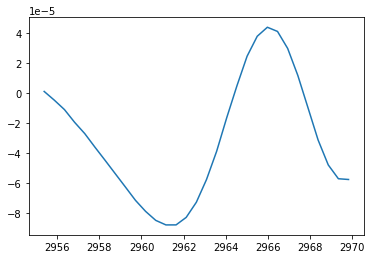

In [29]:
signal = pd.read_csv(root_df[0],header=None)[1]
X = pd.read_csv(root_df[0],header=None)[0]
start=2955
end=2970
start_idx=np.where(X>start)[0][0]
end_idx=np.where(X>end)[0][0]
signal_p=signal[start_idx:end_idx]
X_p=X[start_idx:end_idx]
plt.plot(X_p,signal_p)

In [91]:
Z=[]
for i in M.columns[1:]:
    low = int(np.min(M[i])-2.5)
    high = int(np.max(M[i])+2.5)
    print(low,high)
    Z.append([low,high])

2952 2968
2914 2931
2865 2878
2843 2858
1683 1699
1648 1659
1633 1644
1539 1557
1520 1537
1508 1520
1226 1244
1075 1092
1051 1068
1040 1058
3320 3336
3056 3073
3005 3026
1731 1748
1704 1721
1602 1618
1567 1586
1459 1475
1442 1460
1392 1411
1302 1322
1143 1161
1014 1031


In [100]:
Z[4]

[1683, 1699]

In [94]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
def calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    line_y_at_peak = m * peak_x + b
    vertical_distance = abs(peak_y - line_y_at_peak)
    y_axis_distance = peak_y - line_y_at_peak
    area = 0.5 * abs((x2 - x1) * (peak_y + line_y_at_peak - y1 - y2))
    peak_height = peak_y - min(y1, y2)
    return y_axis_distance, vertical_distance, area, peak_height

Recorder_sigs=[]

root_df=glob.glob(r0+r'\daici\LLL\LLL P20二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

root_df=glob.glob(r0+r'\daici\LLL\LLL P25二阶后\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

root_df=glob.glob(r0+r'\daici\LLL\LLL P30 二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

In [93]:
Recorder_sigs

[array([[1.00569500e+03, 4.88201910e-04, 4.88201910e-04, 5.76159068e-01,
         8.54932300e-04],
        [1.01244500e+03, 2.97529809e-04, 2.97529809e-04, 1.92592836e-03,
         3.04928640e-04],
        [1.01967700e+03, 3.31690050e-04, 3.31690050e-04, 8.79532375e-03,
         3.79568700e-04],
        ...,
        [3.98276600e+03, 1.22478194e-04, 1.22478194e-04, 3.08651901e-03,
         1.58112960e-04],
        [3.99096200e+03, 2.19270300e-05, 2.19270300e-05, 1.44202260e-04,
         2.93004100e-05],
        [3.99674700e+03, 1.11422736e-04, 1.11422736e-04, 1.41277732e-02,
         2.53562200e-04]]),
 array([[1.00569500e+03, 4.88201910e-04, 4.88201910e-04, 5.76159068e-01,
         8.54932300e-04],
        [1.01244500e+03, 2.97529809e-04, 2.97529809e-04, 1.92592836e-03,
         3.04928640e-04],
        [1.01967700e+03, 3.31690050e-04, 3.31690050e-04, 8.79532375e-03,
         3.79568700e-04],
        ...,
        [3.98276600e+03, 1.22478194e-04, 1.22478194e-04, 3.08651901e-03,
        

In [3]:
import xgboost as xgb
for peak_number in range(25):
    low,high = Z[peak_number]
    P=[]
    Y=[]
    for n,single_signal in enumerate(Recorder_sigs):
        peak_value=M.iloc[n,1+peak_number]
        valid_peak = (single_signal[:,0] > low) & (single_signal[:,0] < high)
        peaks = single_signal[valid_peak]
        if len(peaks)==0:
            continue
        else:
            for peak in peaks:
                P+=[list(peak)+[peak_value]]
            Y_p= [0 for i in range(len(peaks))]
            Y_max = np.argmax(np.abs(peak_value-peaks[:,0]))
            Y_p[Y_max]=1
            Y+=Y_p
    if len(P)==0:
        continue

    params = {
    'objective':  'reg:squarederror',  # or 'reg:squarederror' for regression problems
    'eval_metric': 'logloss',  # or 'rmse' for regression problems
    'max_depth': 3,  # Increased tree depth
    'learning_rate': 0.1,  # Learning rate
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
    'gamma': 0,  # Minimum loss reduction required to make a further partition
    'subsample': 1,  # Subsample ratio of the training instance
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'alpha': 0,  # L1 regularization term on weights
    'lambda': 0,  # L2 regularization term on weights
        'eval_metric': 'logloss'  # Add this line
    }
    dtrain = xgb.DMatrix(P, label=Y)
    bst = xgb.train(params, dtrain, num_boost_round=100)
    dtest = xgb.DMatrix(P)
    preds = bst.predict(dtest)
    predictions = [round(value) for value in preds]
    print(np.sum([predictions[i]==Y[i] for i in range(len(Y))])/len(Y))
    # Save model to file
    bst.save_model(M.columns[1+peak_number]+'xgboost_model.json')


NameError: name 'Z' is not defined

In [9]:
root_df=glob.glob(r0+r'\daici\LLL\LLL P20二阶\*')
Recorder_sigstest=[]
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[index_id],header=None)[0]
    signal = pd.read_csv(root_df[index_id],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigstest.append(np.array(Recorder))

In [10]:
位移集合=[]
for peak_number in range(25):
    if peak_number==9:continue
    位移=[]
    low,high = Z[peak_number]
    P=[]
    selection=[]
    for n,single_signal in enumerate(Recorder_sigstest):
        selection.append([])
        peak_value=M.iloc[n,1+peak_number]
        valid_peak = (single_signal[:,0] > low) & (single_signal[:,0] < high)
        peaks = single_signal[valid_peak]
        if len(peaks)==0:
            continue
        else:
            for peak in peaks:
                P+=[list(peak)+[peak_value]]
                selection[-1].append(len(P)-1)
    if P==[]:continue
    dtest = xgb.DMatrix(P)
    # 使用的示例
    # Load model from file
    loaded_model = xgb.Booster()
    cell_name = M.columns[1+peak_number]
    try:
        loaded_model.load_model(r'C:\Users\HCZ\Desktop\TDA\NZM\{}xgboost_model.json'.format(cell_name))
        preds = loaded_model.predict(dtest)
        for select in selection:
            if len(select)==0:
                位移.append(np.nan)
                continue
            chosen = np.argmax(preds[select])
            chosen = select[chosen]
            位移.append(P[chosen][0])
        位移集合.append(位移)
    except:
        continue

In [11]:
位移集合

[[2954.4109999999996,
  2966.946,
  2965.982,
  2955.375,
  2961.643,
  2957.7859999999996,
  2965.982,
  2966.4640000000004,
  2966.4640000000004,
  2958.75,
  2966.4640000000004,
  2960.678,
  nan,
  2953.929,
  2952.482,
  2967.428,
  2966.946,
  2961.643,
  2956.3390000000004,
  2966.946,
  2966.4640000000004,
  2966.946,
  2952.482,
  2966.4640000000004,
  2960.678,
  2965.5,
  2966.4640000000004,
  2967.428,
  2957.304,
  2966.4640000000004,
  2963.571,
  2964.535,
  2965.018,
  2960.196,
  2957.304,
  nan,
  2961.643,
  2965.5,
  2960.196,
  2965.982,
  2958.268,
  2963.0890000000004,
  2967.91,
  2966.946,
  2964.053,
  2957.304,
  2955.375,
  2967.91,
  2967.428,
  2966.946,
  2964.053,
  2952.965,
  2952.965,
  2965.982,
  2967.428,
  2962.125,
  2952.482,
  2956.3390000000004,
  2953.447,
  2967.91,
  2967.91,
  2952.482],
 [2927.4120000000003,
  2928.8590000000004,
  2927.4120000000003,
  2914.877,
  2918.7340000000004,
  2928.377,
  2928.8590000000004,
  2926.93,
  2919.21

In [85]:
pd.DataFrame(位移集合).to_csv('Result.csv')

In [36]:
# 使用的示例
# Load model from file
loaded_model = xgb.Booster()
loaded_model.load_model(r'C:\Users\HCZ\Desktop\TDA\NZM\vas(CH3)xgboost_model.json')
preds = loaded_model.predict(dtest)
print(preds)

[1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04 9.9942142e-01
 9.9951255e-01 1.0001571e+00 5.7353359e-04 9.9942142e-01 9.9951255e-01
 1.0001571e+00 5.7353359e-04 9.9942142e-01 9.9951255e-01 1.0001571e+00
 5.7353359e-04 1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04
 1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04 1.0001571e+00
 5.7353359e-04 9.9942142e-01 9.9951255e-01 9.9942142e-01 9.9951255e-01
 9.9942142e-01 9.9951255e-01 9.9942142e-01 9.9951255e-01 9.9942142e-01
 9.9951255e-01 1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04
 9.9942142e-01 9.9951255e-01 9.9942142e-01 9.9951255e-01 1.0001571e+00
 5.7353359e-04 1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04
 9.9942142e-01 9.9951255e-01 1.0001571e+00 5.7353359e-04 1.0001571e+00
 5.7353359e-04 1.0001571e+00 5.7353359e-04 9.9942142e-01 9.9951255e-01
 9.9942142e-01 9.9951255e-01 9.9942142e-01 9.9951255e-01 1.0001571e+00
 5.7353359e-04 1.0001571e+00 5.7353359e-04 1.0001571e+00 5.7353359e-04
 9.994

In [147]:
peak_number = 1

low,high = Z[peak_number]
P=[]
Y=[]
for n,single_signal in enumerate(Recorder_sigs):
    peak_value=M.iloc[n,1+peak_number]
    valid_peak = (single_signal[:,0] > low) & (single_signal[:,0] < high)
    peaks = single_signal[valid_peak]
    if len(peaks)==0:
        continue
    else:
        for peak in peaks:
            P+=[list(peak)+[peak_value]]
        Y_p= [0 for i in range(len(peaks))]
        Y_max = np.argmax(np.abs(peak_value-peaks[:,0]))
        Y_p[Y_max]=1
        Y+=Y_p


In [140]:
P

[array([1.30412600e+03, 3.89784437e-04, 3.89784437e-04, 1.24138874e-02,
        4.00127700e-04]),
 array([1.31135700e+03, 4.79979265e-04, 4.79979265e-04, 2.86140263e-01,
        7.99535100e-04]),
 array([1.31666100e+03, 1.08044415e-04, 1.08044415e-04, 6.35467280e-04,
        1.53014960e-04]),
 array([1.30412600e+03, 3.89784437e-04, 3.89784437e-04, 1.24138874e-02,
        4.00127700e-04]),
 array([1.31135700e+03, 4.79979265e-04, 4.79979265e-04, 2.86140263e-01,
        7.99535100e-04]),
 array([1.31666100e+03, 1.08044415e-04, 1.08044415e-04, 6.35467280e-04,
        1.53014960e-04]),
 array([1.30412600e+03, 3.89784437e-04, 3.89784437e-04, 1.24138874e-02,
        4.00127700e-04]),
 array([1.31135700e+03, 4.79979265e-04, 4.79979265e-04, 2.86140263e-01,
        7.99535100e-04]),
 array([1.31666100e+03, 1.08044415e-04, 1.08044415e-04, 6.35467280e-04,
        1.53014960e-04]),
 array([1.30412600e+03, 3.89784437e-04, 3.89784437e-04, 1.24138874e-02,
        4.00127700e-04]),
 array([1.31135700e+

In [111]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

# Create the model
model = Sequential()
model.add(Dense(120, input_dim=5, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(np.array(P), np.array(Y), epochs=500, batch_size=10)
# Evaluate the model
loss, accuracy = model.evaluate(np.array(P), np.array(Y))
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/500
53/53 [==============================] - 0s 979us/step - loss: 5.0086 - accuracy: 0.5429
Epoch 2/500
53/53 [==============================] - 0s 938us/step - loss: 3.8624 - accuracy: 0.5867
Epoch 3/500
53/53 [==============================] - 0s 922us/step - loss: 2.9371 - accuracy: 0.5314
Epoch 4/500
53/53 [==============================] - 0s 967us/step - loss: 1.7022 - accuracy: 0.5371
Epoch 5/500
53/53 [==============================] - 0s 961us/step - loss: 2.5241 - accuracy: 0.5543
Epoch 6/500
53/53 [==============================] - 0s 917us/step - loss: 2.9142 - accuracy: 0.5524
Epoch 7/500
53/53 [==============================] - 0s 924us/step - loss: 2.5431 - accuracy: 0.5333
Epoch 8/500
53/53 [==============================] - 0s 975us/step - loss: 3.2805 - accuracy: 0.5371
Epoch 9/500
53/53 [==============================] - 0s 973us/step - loss: 1.5324 - accuracy: 0.5867
Epoch 10/500
53/53 [==============================] - 0s 941us/step - loss: 2.0020 - accura

53/53 [==============================] - 0s 1ms/step - loss: 0.9606 - accuracy: 0.5314
Epoch 158/500
53/53 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.6038
Epoch 159/500
53/53 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.6057
Epoch 160/500
53/53 [==============================] - 0s 960us/step - loss: 0.8374 - accuracy: 0.5733
Epoch 161/500
53/53 [==============================] - 0s 866us/step - loss: 0.7915 - accuracy: 0.5810
Epoch 162/500
53/53 [==============================] - 0s 957us/step - loss: 0.8503 - accuracy: 0.5600
Epoch 163/500
53/53 [==============================] - 0s 960us/step - loss: 0.7634 - accuracy: 0.5943
Epoch 164/500
53/53 [==============================] - 0s 941us/step - loss: 1.1427 - accuracy: 0.5752
Epoch 165/500
53/53 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.5600
Epoch 166/500
53/53 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0

53/53 [==============================] - 0s 903us/step - loss: 0.6506 - accuracy: 0.6610
Epoch 316/500
53/53 [==============================] - 0s 926us/step - loss: 0.6431 - accuracy: 0.6590
Epoch 317/500
53/53 [==============================] - 0s 888us/step - loss: 0.6510 - accuracy: 0.6667
Epoch 318/500
53/53 [==============================] - 0s 941us/step - loss: 0.6448 - accuracy: 0.6667
Epoch 319/500
53/53 [==============================] - 0s 939us/step - loss: 0.6453 - accuracy: 0.6667
Epoch 320/500
53/53 [==============================] - 0s 901us/step - loss: 0.6465 - accuracy: 0.6667
Epoch 321/500
53/53 [==============================] - 0s 926us/step - loss: 0.6426 - accuracy: 0.6667
Epoch 322/500
53/53 [==============================] - 0s 919us/step - loss: 0.6713 - accuracy: 0.6324
Epoch 323/500
53/53 [==============================] - 0s 901us/step - loss: 0.6568 - accuracy: 0.6362
Epoch 324/500
53/53 [==============================] - 0s 892us/step - loss: 0.6655 - a

53/53 [==============================] - 0s 923us/step - loss: 0.6382 - accuracy: 0.6667
Epoch 474/500
53/53 [==============================] - 0s 921us/step - loss: 0.6384 - accuracy: 0.6667
Epoch 475/500
53/53 [==============================] - 0s 908us/step - loss: 0.6397 - accuracy: 0.6667
Epoch 476/500
53/53 [==============================] - 0s 914us/step - loss: 0.6363 - accuracy: 0.6667
Epoch 477/500
53/53 [==============================] - 0s 854us/step - loss: 0.6393 - accuracy: 0.6667
Epoch 478/500
53/53 [==============================] - 0s 868us/step - loss: 0.6359 - accuracy: 0.6667
Epoch 479/500
53/53 [==============================] - 0s 884us/step - loss: 0.6376 - accuracy: 0.6667
Epoch 480/500
53/53 [==============================] - 0s 908us/step - loss: 0.6379 - accuracy: 0.6667
Epoch 481/500
53/53 [==============================] - 0s 866us/step - loss: 0.6370 - accuracy: 0.6667
Epoch 482/500
53/53 [==============================] - 0s 874us/step - loss: 0.6370 - a

In [ ]:
# 使用的示例
# Load model from file
loaded_model = xgb.Booster()
loaded_model.load_model('xgboost_model.json')
# Make predictions
dtest = xgb.DMatrix(X_test)
preds = loaded_model.predict(dtest)


In [112]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
P_poly = poly.fit_transform(P)


In [114]:
len(P_poly[0])

21

In [48]:
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
bst = xgb.train(params, dtrain, num_boost_round=100)
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]


[13:34:36] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:34:36] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
def calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    line_y_at_peak = m * peak_x + b
    vertical_distance = abs(peak_y - line_y_at_peak)
    y_axis_distance = peak_y - line_y_at_peak
    area = 0.5 * abs((x2 - x1) * (peak_y + line_y_at_peak - y1 - y2))
    peak_height = peak_y - min(y1, y2)
    return y_axis_distance, vertical_distance, area, peak_height
def extract_peak_features_from_directory(directory_path):
    root_df = glob.glob(directory_path + '*')
    Recorder_sigs = []
    
    for index_id in range(len(root_df)):
        Recorder = []
        df = pd.read_csv(root_df[index_id], header=None)
        x_index = df[0]
        signal = df[1]
        
        # Find peaks
        peaks, _ = find_peaks(signal)
        
        # Calculate prominences and related information
        prominences, left_bases, right_bases = peak_prominences(signal, peaks)
        
        # Calculate metrics for each peak
        for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
            x1, y1 = left_base, signal[left_base]
            x2, y2 = right_base, signal[right_base]
            peak_x, peak_y = peak_index, signal[peak_index]
            
            y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
            Recorder.append([x_index[peak_index], y_axis_distance, vertical_distance, area, peak_height])
        
        Recorder_sigs.append(np.array(Recorder))
    
    return Recorder_sigs


In [12]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
def calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    line_y_at_peak = m * peak_x + b
    vertical_distance = abs(peak_y - line_y_at_peak)
    y_axis_distance = peak_y - line_y_at_peak
    area = 0.5 * abs((x2 - x1) * (peak_y + line_y_at_peak - y1 - y2))
    peak_height = peak_y - min(y1, y2)
    return y_axis_distance, vertical_distance, area, peak_height

Recorder_sigs=[]

root_df=glob.glob(r'C:\Users\HCZ\Desktop\TDA\NZM\二阶导\LLL代次\LLL P20二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

root_df=glob.glob(r'C:\Users\HCZ\Desktop\TDA\NZM\LLL 代次(1)\LLL 代次\NPC LLL P25\分波段 NPC LLL P25\二阶后\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

root_df=glob.glob(r'C:\Users\HCZ\Desktop\TDA\NZM\LLL 代次(1)\LLL 代次\NPC LLL P30\LLL NP30 二阶\*')
for index_id in range(len(root_df)):
    Recorder=[]
    x_index = pd.read_csv(root_df[0],header=None)[0]
    signal = pd.read_csv(root_df[0],header=None)[1]
    # 找到峰值
    peaks, _ = find_peaks(signal)
    # 计算prominence以及相关信息
    prominences, left_bases, right_bases = peak_prominences(signal, peaks)
    # 分别计算每个峰值的指标
    for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
        x1, y1 = left_base, signal[left_base]
        x2, y2 = right_base, signal[right_base]
        peak_x, peak_y = peak_index, signal[peak_index]
        y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
        Recorder.append([x_index[peak_index],y_axis_distance, vertical_distance, area, peak_height])
    Recorder_sigs.append(np.array(Recorder))

In [14]:
GT=M

In [8]:
uncorrect,correct=0,0
maximum_filter=[0]
for checking in range(2950,2970):
    for filterthe in range(10):
        result=[]
        for index_id in range(len(Recorder_sigs)):
            #这里[:,1]是过滤过小峰的条件，可能需要修改
            R_new=Recorder_sigs[index_id][:,0][Recorder_sigs[index_id][:,1]>filterthe/100000]
            m=np.argmin(np.abs(R_new-GT[index_id]))
            n=np.argmin(np.abs(R_new-checking))
            result.append(m-n)
        result=np.array(result)
        most_num=np.sort(result)[len(result)//2]
        correct_rate= np.sum(result==most_num)/len(result)
        if correct_rate>maximum_filter[0]:
            print(correct_rate)
            maximum_filter=[correct_rate,checking,filterthe]

NameError: name 'GT' is not defined

In [13]:
# columns=['νas(CH3)', 'νas(CH2)', 'νs(CH3) ', 'νs(CH2) ',
#        'N-H bending of Amide I', 'α-helical of Amide I',
#        'β-pleated sheet of Amide I', 'α-helical of Amide II',
#        'β-pleated sheet of Amide II', '‘‘Tyrosine’’ band ', 'νas(PO2-) ',
#        'νs(PO2-)', 'C-O stretching vibratios:DNA',
#        'C-O stretching vibratios:RNA']
columns=[i for i in range(25)]
# search=[(3500,3300,1),(3135,3100,1),(3100,3000,1),(2975,2950,1),(2940,2900,1),(2880,2850,1),(2860,2840,1),(1750,1730,1),(1700,1685,1),(1660,1620,3),(1620,1560,2),(1560,1540,1),(1540,1520,1),(1525,1500,1),(1490,1440,2),(1430,1390,1),(1325,1300,1),(1245,1230,1),(1095,1075,1),(1065,1040,2)]


In [ ]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
# 示例信号
signal = np.sin(np.linspace(0, 6 * np.pi, 100)) + 0.1 * np.random.normal(size=100) #for i in range(20)]

# 找到峰值
peaks, _ = find_peaks(signal)

# 计算prominence以及相关信息
prominences, left_bases, right_bases = peak_prominences(signal, peaks)

def calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    line_y_at_peak = m * peak_x + b
    vertical_distance = abs(peak_y - line_y_at_peak)
    y_axis_distance = peak_y - line_y_at_peak
    area = 0.5 * abs((x2 - x1) * (peak_y + line_y_at_peak - y1 - y2))
    peak_height = peak_y - min(y1, y2)
    return y_axis_distance, vertical_distance, area, peak_height

# 分别计算每个峰值的指标
for peak_index, left_base, right_base in zip(peaks, left_bases, right_bases):
    x1, y1 = left_base, signal[left_base]
    x2, y2 = right_base, signal[right_base]
    peak_x, peak_y = peak_index, signal[peak_index]
    y_axis_distance, vertical_distance, area, peak_height = calculate_peak_metrics(x1, y1, x2, y2, peak_x, peak_y)
    
    print(f"Peak at index {peak_index}:")
    print(f"  Y-axis distance: {y_axis_distance}")
    print(f"  Vertical distance: {vertical_distance}")
    print(f"  Area: {area}")
    print(f"  Peak height: {peak_height}")

In [18]:
# columns=['νas(CH3)', 'νas(CH2)', 'νs(CH3) ', 'νs(CH2) ',
#        'N-H bending of Amide I', 'α-helical of Amide I',
#        'β-pleated sheet of Amide I', 'α-helical of Amide II',
#        'β-pleated sheet of Amide II', '‘‘Tyrosine’’ band ', 'νas(PO2-) ',
#        'νs(PO2-)', 'C-O stretching vibratios:DNA',
#        'C-O stretching vibratios:RNA']
columns=[i for i in range(25)]
search=[(3500,3300,1),(3135,3100,1),(3100,3000,1),(2975,2950,1),(2940,2900,1),(2880,2850,1),(2860,2840,1),(1750,1730,1),(1700,1685,1),(1660,1620,3),(1620,1560,2),(1560,1540,1),(1540,1520,1),(1525,1500,1),(1490,1440,2),(1430,1390,1),(1325,1300,1),(1245,1230,1),(1095,1075,1),(1065,1040,2)]

位移s=[]
峰高s=[]
面积s=[]
for name in root_df:
    df = pd.read_csv(name,header=None)
    位移 = []
    峰高 = []
    面积 = []
    Y=-df[1]
    X=df[0]
    #如果找不到改这里
    f = scipy.interpolate.interp1d(X,Y,kind='cubic')
    #调整插值间隔
    X = np.arange(X[0],X.values[-1],0.03125)
    Y = f(X)
    peaks,properties=find_peaks(Y,prominence=0.00001)
    for (end,start,nums) in search:
        start_idx=np.where(X>start)[0][0]
        end_idx=np.where(X>end)[0][0]
        prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
        if np.sum(prom)==0:
            for i in range(nums):
                位移.append(np.nan)
                峰高.append(np.nan)
                面积.append(np.nan)
                continue
        peaks_idx=np.where(np.bitwise_and(peaks>start_idx, peaks<end_idx))
        new_peaks=peaks[peaks_idx]
        L=np.argsort(properties["prominences"][prom])[-nums:]
        Z=np.argsort(X[new_peaks[L]])[::-1]
        for max_index in L[Z]:
            位移.append(X[new_peaks[max_index]])
            left=new_peaks[max_index]
            while(Y[left-1]<Y[left]):left-=1
            right=new_peaks[max_index]
            while(Y[right+1]<Y[right]):right+=1
            ratio=(new_peaks[max_index]-left)/(right-left)
            correction=ratio*Y[right]+(1-ratio)*Y[left]
            峰高.append(Y[new_peaks[max_index]]-correction)
            面积.append(np.sum(Y[left:right])-(right-left)*(Y[left]+Y[right])/2)
    位移s.append(位移)
    峰高s.append(峰高)
    面积s.append(面积)
Cell_df1=pd.DataFrame(位移s,columns=columns)
Cell_df2=pd.DataFrame(峰高s,columns=columns)
Cell_df3=pd.DataFrame(面积s,columns=columns)
# for i in columns:
#     meanVal = Cell_df1[i].mean()
#     Cell_df1[i].fillna(value=meanVal, inplace=True)
#     meanVal = Cell_df2[i].mean()
#     Cell_df2[i].fillna(value=meanVal, inplace=True)
writer = pd.ExcelWriter('output.xlsx')
Cell_df1.to_excel(writer,sheet_name='位移')
Cell_df2.to_excel(writer,sheet_name='峰高')
Cell_df3.to_excel(writer,sheet_name='面积')
writer.save()

In [12]:
len(search)

20

In [10]:
np.argsort([0,1,2])

array([0, 1, 2], dtype=int64)

In [8]:
位移s=[]
峰高s=[]
面积s=[]
for name in root_df:
    df = pd.read_csv(name,header=None)
    位移 = []
    峰高 = []
    面积 = []
    Y=-df[1]
    X=df[0]
    #如果找不到改这里
    f = scipy.interpolate.interp1d(X,Y,kind='cubic')
    #调整插值间隔
    X = np.arange(X[0],X.values[-1],0.03125)
    Y = f(X)
    peaks,properties=find_peaks(Y,prominence=0.00001)
    for (start,end) in search:
        start_idx=np.where(X>start)[0][0]
        end_idx=np.where(X>end)[0][0]
        prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
        if np.sum(prom)==0:
            for i in range(4):
                start=start-2
                end=end+2
                start_idx=np.where(X>start)[0][0]
                end_idx=np.where(X>end)[0][0]
                prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
                if np.sum(prom)>0:
                    break
            else:
                位移.append(np.nan)
                峰高.append(np.nan)
                continue
        peaks_idx=np.where(np.bitwise_and(peaks>start_idx, peaks<end_idx))
        new_peaks=peaks[peaks_idx]
        max_index=np.argmax(properties["prominences"][prom])
        位移.append(X[new_peaks[max_index]])
        left=new_peaks[max_index]
        while(Y[left-1]<Y[left]):left-=1
        right=new_peaks[max_index]
        while(Y[right+1]<Y[right]):right+=1
        ratio=(new_peaks[max_index]-left)/(right-left)
        correction=ratio*Y[right]+(1-ratio)*Y[left]
        峰高.append(Y[new_peaks[max_index]]-correction)
        面积.append(np.sum(Y[left:right])-(right-left)*(Y[left]+Y[right])/2)
    位移s.append(位移)
    峰高s.append(峰高)
    面积s.append(面积)
Cell_df1=pd.DataFrame(位移s,columns=columns)
Cell_df2=pd.DataFrame(峰高s,columns=columns)
Cell_df3=pd.DataFrame(面积s,columns=columns)
for i in columns:
    meanVal = Cell_df1[i].mean()
    Cell_df1[i].fillna(value=meanVal, inplace=True)
    meanVal = Cell_df2[i].mean()
    Cell_df2[i].fillna(value=meanVal, inplace=True)
writer = pd.ExcelWriter('output.xlsx')
Cell_df1.to_excel(writer,sheet_name='位移')
Cell_df2.to_excel(writer,sheet_name='峰高')
Cell_df3.to_excel(writer,sheet_name='面积')
writer.save()

In [123]:
for i in columns:
    feature_mean=Cell_df1[i].mean()
    feature_std=Cell_df1[i].std()
    smaller = np.where(Cell_df1[i].values<feature_mean-2*feature_std)[0]
    bigger = np.where(Cell_df1[i].values>feature_mean+2*feature_std)[0]
    to_change_cells = np.hstack([smaller,bigger])
    for change_cell in to_change_cells:
        df=pd.read_csv(root_df[change_cell],header=None)
        Y=-df[1]
        X=df[0]
        #如果找不到改这里
        f = scipy.interpolate.interp1d(X,Y,kind='cubic')
        #调整插值间隔
        X = np.arange(X[0],X.values[-1],0.03125)
        Y = f(X)
        peaks,properties=find_peaks(Y,prominence=0.00001)
        start,end=feature_mean,feature_mean
        start_idx=np.where(X>start)[0][0]
        end_idx=np.where(X>end)[0][0]
        prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
        if np.sum(prom)==0:
            for j in range(8):
                start=start-0.5
                end=end+0.5
                start_idx=np.where(X>start)[0][0]
                end_idx=np.where(X>end)[0][0]
                prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
                if np.sum(prom)>0:
                    break
            else:
                continue
        #print(change_cell,feature_mean,feature_std,Cell_df1.loc[change_cell,i])
        #print(start,end)
        peaks_idx=np.where(np.bitwise_and(peaks>start_idx, peaks<end_idx))
        new_peaks=peaks[peaks_idx]
        max_index=np.argmax(properties["prominences"][prom])
        Cell_df1.loc[change_cell,i]=X[new_peaks[max_index]]
#         if Cell_df1.loc[change_cell,i]!=X[new_peaks[max_index]]:
#             print(change_cell,i,X[new_peaks[max_index]])
#             pass
        left=new_peaks[max_index]
        while(Y[left-1]<Y[left]):left-=1
        right=new_peaks[max_index]
        while(Y[right+1]<Y[right]):right+=1
        ratio=(new_peaks[max_index]-left)/(right-left)
        correction=ratio*Y[right]+(1-ratio)*Y[left]
        Cell_df2.loc[change_cell,i]=Y[new_peaks[max_index]]-correction
        

In [129]:
for i in columns:
    feature_mean=Cell_df1[i].mean()
    feature_std=Cell_df1[i].std()
    smaller = np.where(Cell_df1[i].values<feature_mean-1.2*feature_std)[0]
    bigger = np.where(Cell_df1[i].values>feature_mean+1.2*feature_std)[0]
    to_change_cells = np.hstack([smaller,bigger])
    for change_cell in to_change_cells:
        df=pd.read_csv(root_df[change_cell],header=None)
        Y=-df[1]
        X=df[0]
        #如果找不到改这里
        f = scipy.interpolate.interp1d(X,Y,kind='cubic')
        #调整插值间隔
        X = np.arange(X[0],X.values[-1],0.03125)
        Y = f(X)
        peaks,properties=find_peaks(Y,prominence=0.000005)
        start,end=feature_mean,feature_mean
        start_idx=np.where(X>start)[0][0]
        end_idx=np.where(X>end)[0][0]
        prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
        if np.sum(prom)==0:
            for j in range(8):
                start=start-0.3
                end=end+0.3
                start_idx=np.where(X>start)[0][0]
                end_idx=np.where(X>end)[0][0]
                prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
                if np.sum(prom)>0:
                    break
            else:
                continue
        #print(change_cell,feature_mean,feature_std,Cell_df1.loc[change_cell,i])
        #print(start,end)
        peaks_idx=np.where(np.bitwise_and(peaks>start_idx, peaks<end_idx))
        new_peaks=peaks[peaks_idx]
        max_index=np.argmax(properties["prominences"][prom])
        Cell_df1.loc[change_cell,i]=X[new_peaks[max_index]]
#         if Cell_df1.loc[change_cell,i]!=X[new_peaks[max_index]]:
#             print(change_cell,i,X[new_peaks[max_index]])
#             pass
        left=new_peaks[max_index]
        while(Y[left-1]<Y[left]):left-=1
        right=new_peaks[max_index]
        while(Y[right+1]<Y[right]):right+=1
        ratio=(new_peaks[max_index]-left)/(right-left)
        correction=ratio*Y[right]+(1-ratio)*Y[left]
        Cell_df2.loc[change_cell,i]=Y[new_peaks[max_index]]-correction
        

In [130]:
diff_value=test.values[:,1:]-Cell_df1.values
ERRORS=np.abs(diff_value)>0.5
print(np.sum(ERRORS))
for j in range(len(ERRORS[0])):
    for i in range(len(ERRORS)):
        if ERRORS[i][j]==True:
            print(i,columns[j])

44
0 νas(CH2)
7 νas(CH2)
8 νas(CH2)
9 νas(CH2)
36 νas(CH2)
41 νs(CH3) 
19 νs(CH2) 
33 νs(CH2) 
40 νs(CH2) 
6 N-H bending of Amide I
11 N-H bending of Amide I
18 N-H bending of Amide I
21 N-H bending of Amide I
22 N-H bending of Amide I
40 β-pleated sheet of Amide I
47 α-helical of Amide II
54 α-helical of Amide II
3 β-pleated sheet of Amide II
14 β-pleated sheet of Amide II
22 β-pleated sheet of Amide II
26 β-pleated sheet of Amide II
34 β-pleated sheet of Amide II
54 β-pleated sheet of Amide II
0 ‘‘Tyrosine’’ band 
3 νas(PO2-) 
28 νas(PO2-) 
31 νas(PO2-) 
52 νas(PO2-) 
20 νs(PO2-)
26 νs(PO2-)
8 C-O stretching vibratios:DNA
37 C-O stretching vibratios:DNA
17 C-O stretching vibratios:RNA
18 C-O stretching vibratios:RNA
22 C-O stretching vibratios:RNA
23 C-O stretching vibratios:RNA
29 C-O stretching vibratios:RNA
32 C-O stretching vibratios:RNA
35 C-O stretching vibratios:RNA
43 C-O stretching vibratios:RNA
44 C-O stretching vibratios:RNA
48 C-O stretching vibratios:RNA
51 C-O stretchin

In [ ]:
writer = pd.ExcelWriter('output.xlsx')
Cell_df1.to_excel(writer,sheet_name='位移')
Cell_df2.to_excel(writer,sheet_name='峰高')
Cell_df3.to_excel(writer,sheet_name='面积')
writer.save()

In [11]:
test=pd.read_excel(r'C:\Users\HCZ\Desktop\TDA\NZM\LLL\LLL NPC P25.xlsx',sheet_name='位移')

In [109]:
diff_value=test.values[:,1:]-Cell_df1.values

In [13]:
diff_value[pd.isna(diff_value)]=0

In [110]:
np.sum(np.abs(diff_value)>0.5)

45

In [85]:
50/784

0.06377551020408163

In [74]:
np.sum(np.sum(diff_value))

nan

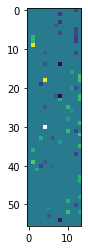

In [116]:
plt.imshow(diff_value)

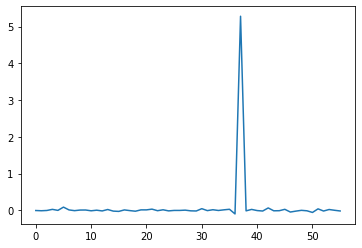

In [67]:
plt.plot(diff_value[:,0])

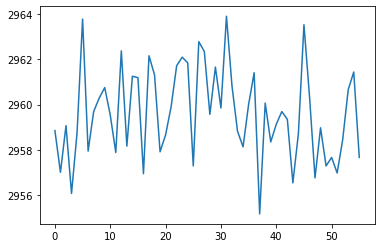

In [70]:
plt.plot(Cell_df1.values[:,0])

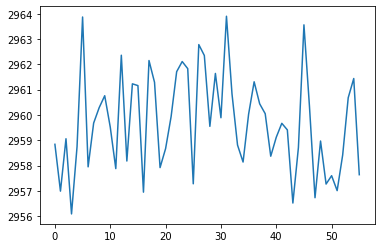

In [72]:
plt.plot(test.values[:,1])

In [68]:
np.argmax(diff_value[:,0])

37

In [69]:
Cell_df1.values[37,0]

2955.16

In [94]:
df=pd.read_csv(r'C:\\Users\\HCZ\\Desktop\\TDA\\NZM\\LLL 代次(1)\\LLL 代次\\NPC LLL P25\\分波段 NPC LLL P25\\二阶后\\@米氏后.csv 37.CSV',header=None)

2955.16
uncorrected 5.333132476386468e-05
height 5.109690064384237e-05
面积 0.007065260228301582


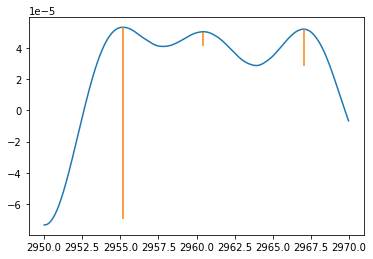

In [97]:

Y=-df[1]
X=df[0]
#如果找不到改这里
f = scipy.interpolate.interp1d(X,Y,kind='cubic')
#调整插值间隔
X = np.arange(X[0],X.values[-1],0.03125)
Y = f(X)
peaks,properties=find_peaks(Y,prominence=0.000001)
#改这里，选择寻找峰高的段落
start,end=2950,2970
start_idx=np.where(X>start)[0][0]
end_idx=np.where(X>end)[0][0]
prom = np.bitwise_and(peaks>start_idx, peaks<end_idx)
peaks_idx=np.where(np.bitwise_and(peaks>start_idx, peaks<end_idx))
plt.plot(X[start_idx:end_idx],Y[start_idx:end_idx])
new_peaks=peaks[peaks_idx]
plt.vlines(x=X[new_peaks],ymin=Y[new_peaks]-properties["prominences"][prom],ymax=Y[new_peaks],color="C1")
max_index=np.argmax(properties["prominences"][prom])
print(X[new_peaks[max_index]])
print('uncorrected',Y[new_peaks[max_index]])
left=new_peaks[max_index]
while(Y[left-1]<Y[left]):left-=1
right=new_peaks[max_index]
while(Y[right+1]<Y[right]):right+=1
ratio=(new_peaks[max_index]-left)/(right-left)
correction=ratio*Y[right]+(1-ratio)*Y[left]
print('height',Y[new_peaks[max_index]]-correction)
print('面积',np.sum(Y[left:right])-(right-left)*(Y[left]+Y[right])/2)

In [28]:
X.values

array([ 999.91 , 1000.392, 1000.874, ..., 3999.158, 3999.64 , 4000.122])

In [16]:
np.arange(0.1,2,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [45]:
X=0.01*np.array([i for i in range(500)])
Y=np.sin(X)+np.sin(3*X)
peaks,properties=find_peaks(Y,prominence=0.1)

[ 62 253 471]


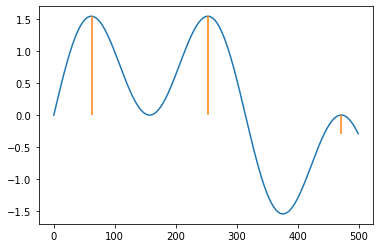

In [46]:
plt.plot(Y)
plt.vlines(x=peaks,ymin=Y[peaks]-properties["prominences"],ymax=Y[peaks],color="C1")
print(peaks)

In [38]:
Y = np.cos(X)-3*np.cos(3*X)
peaks,properties=find_peaks(Y,prominence=0.5)

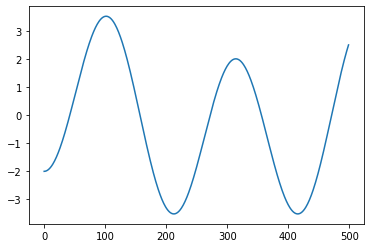

In [39]:
plt.plot(Y)

[ 53 261 471]


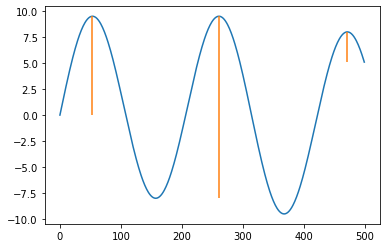

In [47]:
Y = np.sin(X)+9*np.sin(3*X)
peaks,properties=find_peaks(Y,prominence=0.5)
plt.plot(Y)
plt.vlines(x=peaks,ymin=Y[peaks]-properties["prominences"],ymax=Y[peaks],color="C1")
print(peaks)

[ 53 261 471]


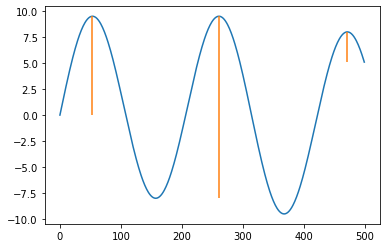

In [19]:
properties["prominences"]

array([1.5384901 , 1.53522217])

In [15]:
properties

{}